# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

## 0. 데이터 불러오기

In [38]:
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


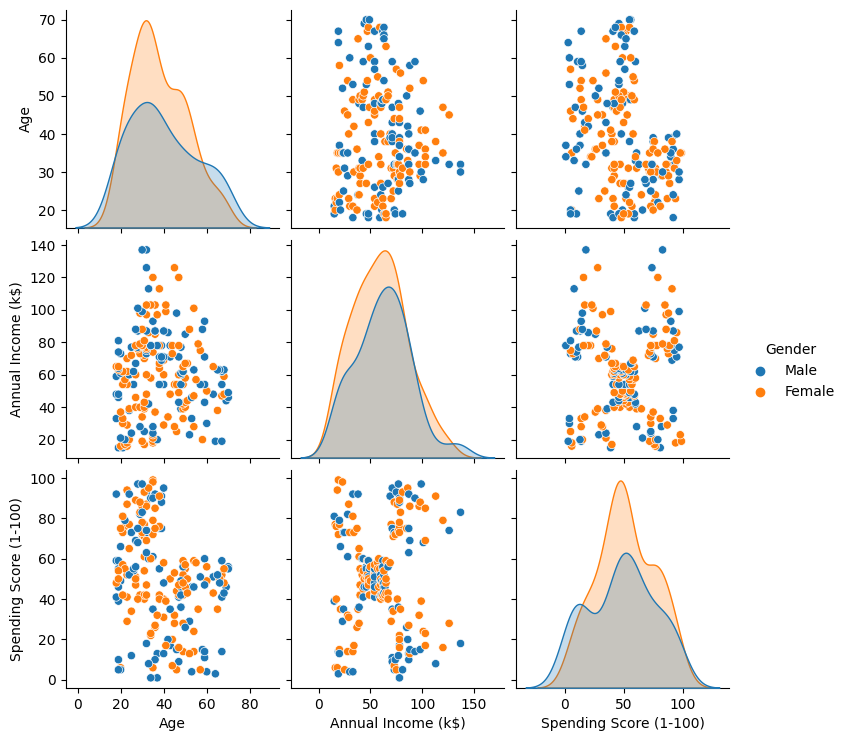

In [40]:
sns.pairplot(df, hue = "Gender")
plt.show()

군집화가 잘 되리라 예상할 수 있는 speding score, annual income column에 대해 clustering을 진행하고, 이들을 시각화하기로 결정한다.

In [41]:
df_=df.iloc[:,2:4]

In [42]:
scaler=StandardScaler()
df_=scaler.fit_transform(df_)

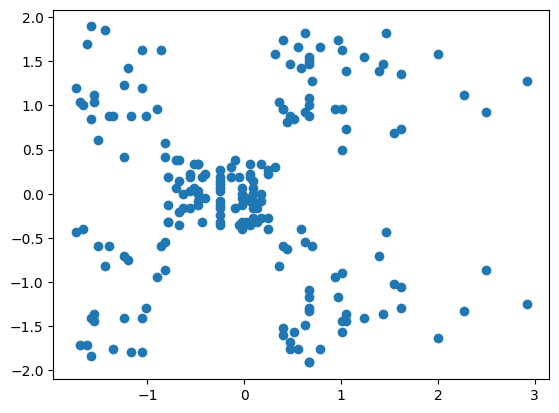

In [43]:
plt.scatter(df_[:,0],df_[:,1])

In [44]:
pd.DataFrame(df_)

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## 2. Clustering

- k-means clustering

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(df_)
        cluster = kmeans.predict(df_)
        score = silhouette_score(df_, cluster)

        print("군집 수 : {}, 실루엣 점수 : {:.3f}".format(n_cluster, score))

군집 수 : 2, 실루엣 점수 : 0.290
군집 수 : 3, 실루엣 점수 : 0.467
군집 수 : 4, 실루엣 점수 : 0.494
군집 수 : 5, 실루엣 점수 : 0.555
군집 수 : 6, 실루엣 점수 : 0.539
군집 수 : 7, 실루엣 점수 : 0.453
군집 수 : 8, 실루엣 점수 : 0.453
군집 수 : 9, 실루엣 점수 : 0.458
군집 수 : 10, 실루엣 점수 : 0.451


In [46]:
k_means=KMeans(n_clusters=5,random_state=0)
k_means.fit(df_)

KMeans(n_clusters=5, random_state=0)

In [54]:
df_[0]

array([-1.73899919, -0.43480148])

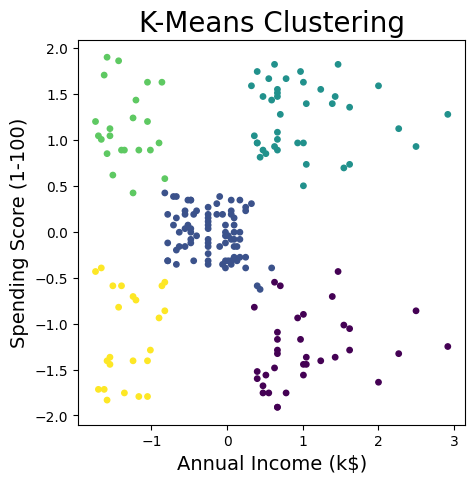

In [56]:
df['KMeans_labels']=k_means.labels_

plt.figure(figsize=(5,5))
plt.scatter(df_[:,0],df_[:,1],c=df['KMeans_labels'],s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.show()

- DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN() # eps = 0.5 / min_samples = 5
dbscan.fit(df_)

DBSCAN()

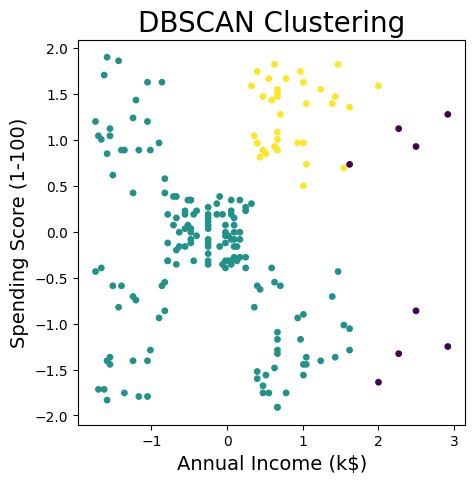

In [59]:
df['DBSCAN_labels']=dbscan.labels_ 

plt.figure(figsize=(5,5))
plt.scatter(df_[:,0],df_[:,1],c=df['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.show()

clustering이 효과적으로 이루어지지 않았으므로, 하이퍼파라미터 튜닝을 진행한다.

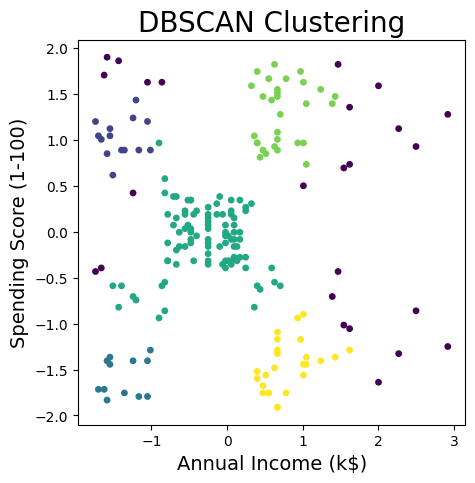

In [89]:
dbscan=DBSCAN(eps=0.4, min_samples=8)
dbscan.fit(df_)

df['DBSCAN_labels']=dbscan.labels_ 

plt.figure(figsize=(5,5))
plt.scatter(df_[:,0],df_[:,1],c=df['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.show()

## 3. Evaluation

K-means 방식의 경우 시각화를 통해 잘 이루어진 clustering 결과를 확인할 수 있었지만, DBSCAN의 경우에는 그렇지 못하다. 밀도 기반의 parameter를 여러 방면으로 조절해볼 수 있었으나, 결론적으로 최적의 parameter를 찾아내지는 못하였다. 분산의 차이가 크게 나타나기 때문에 해당 결과가 나타난 것으로 보인다. K-means의 경우 해당 데이터가 5개의 군집을 이루는 것을 시각적으로 쉽게 확인할 수 있고, 실루엣 계수를 통해서도 드러나기 때문에 효과적인 clustering의 모습을 보인 것으로 예상된다.